# Subroutine 1
Generate points based on the labels (taken as an input from the GUI)
structure of the point:
    (t0, vel, flag (1=hyperbolic, 0=linear), label)

In [5]:
import random
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


def points_gen(nDA,nR,nCN):
    # The function generates random values of t0 - velocity pairs
    # based on number of requested waves:
    # nDA - number of direct waves (linear moveout, label 'D')
    # nR - number of reflections (hyperbolic moveout, label 'R')
    # nCN - number of coherent noise events (linear moveout, label 'N')
    # outputs (nDA+nR+nCN) * (4) list
    # each point in the list has the following structure
    # [t0 (intercept time), velocity, flag(1=hyperbolic, 0=linear), label(see above))]
    
    
    # direct arrival
    direct = []
    n = 1
    while (n <= nDA):
        direct.append([0,random.uniform(.5,1.5),0,'D'])
        n = n+1
    
    n = 1
    reflected = []
    while (n <= nR):
        reflected.append([random.uniform(0,4),random.uniform(1.5,5),1,'R'])
        n = n+1
        
    n = 1
    noise = []
    while (n <= nCN):
        noise.append([random.uniform(-2,2),random.uniform(-3,3),0,'N'])
        n = n+1
        
    events = direct + reflected + noise
    return events

In [6]:
def points_plot(events):
    x = [x/1000 for x in range(0,2000,25)]
    
    fig, ax = plt.subplots()
    
    # plot waves
    for i in events:
        if i[3] == 'D':
            y = [offset/i[1] for offset in x]
            ax.plot(x,y,'r')
        if i[3] == 'N':
            ax.plot(x,[i[0]+offset/i[1] for offset in x],'b')
        if i[3] == 'R':
            ax.plot(x,[np.sqrt(i[0]**2 + offset**2 / i[1]**2) for offset in x],'g')
    
    plt.ylabel('Time, s')
    plt.xlabel('Offset, km')
    ax.set_xlim([0,2])
    ax.set_ylim([0,4])
    ax.invert_yaxis()
    ax.set_aspect(1)
    return ax

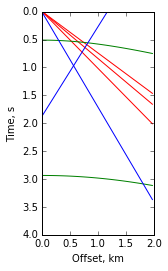

In [7]:
events=points_gen(3,2,3)
ax = points_plot(events)
plt.show(ax)

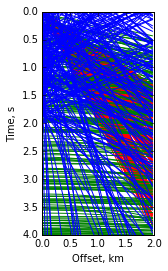

In [8]:
events2=points_gen(300,200,300)
ax2 = points_plot(events2)
plt.show(ax2)

In [9]:
events2

[[0, 0.7399099417966519, 0, 'D'],
 [0, 1.3070075307186437, 0, 'D'],
 [0, 0.6720570209518797, 0, 'D'],
 [0, 1.3391900586084695, 0, 'D'],
 [0, 1.4023335330866078, 0, 'D'],
 [0, 0.7578011252552291, 0, 'D'],
 [0, 0.9248200618834391, 0, 'D'],
 [0, 1.3878814151604326, 0, 'D'],
 [0, 1.2337575869351523, 0, 'D'],
 [0, 0.6991576284294421, 0, 'D'],
 [0, 0.8292545849528055, 0, 'D'],
 [0, 1.4806001936858435, 0, 'D'],
 [0, 1.4224525765918041, 0, 'D'],
 [0, 1.0537529926956957, 0, 'D'],
 [0, 1.2305266618182222, 0, 'D'],
 [0, 0.8264608979759251, 0, 'D'],
 [0, 1.2782935112866332, 0, 'D'],
 [0, 0.899338726334453, 0, 'D'],
 [0, 1.131814181297889, 0, 'D'],
 [0, 1.3742134821071963, 0, 'D'],
 [0, 0.9720063410104813, 0, 'D'],
 [0, 0.7946672210941353, 0, 'D'],
 [0, 0.6503740720590322, 0, 'D'],
 [0, 1.1001488863877733, 0, 'D'],
 [0, 0.9593473987623905, 0, 'D'],
 [0, 0.5447722164435164, 0, 'D'],
 [0, 0.9615001175789412, 0, 'D'],
 [0, 1.4996458373548736, 0, 'D'],
 [0, 0.543469292375325, 0, 'D'],
 [0, 0.8589326984

In [10]:
events

[[0, 1.3479674521859382, 0, 'D'],
 [0, 0.9825848835471969, 0, 'D'],
 [0, 1.189699094327815, 0, 'D'],
 [2.936385215550364, 1.894089053360448, 1, 'R'],
 [0.5111371128019355, 3.592141267395934, 1, 'R'],
 [1.8679158449038202, -0.6258970764171092, 0, 'N'],
 [0.014710067993876752, 0.5888729111306192, 0, 'N'],
 [-1.190348857444183, -0.8156719314845455, 0, 'N']]

In [33]:
events[0]

[0, 1.3479674521859382, 0, 'D']

In [34]:
events[0][0]

0

In [101]:
def makeEventsDict(events):
    eventsDict = {}
    labelsDict = {}
    # direct arrival
    labelsDict['label'] = []
    eventsDict['direct'], eventsDict['reflected'], eventsDict['coherentnoise'] = [],[],[]
    for each in events:
#         print(each)
#         print(each[0])
#         print(each[3])
        eventsDict['direct'].append(each[0])
        eventsDict['reflected'].append(each[1])
        eventsDict['coherentnoise'].append(each[2])
        labelsDict['label'].append(each[3])
    return(eventsDict,labelsDict)



In [102]:
testEvents = makeEventsDict(events)
print(testEvents)

({'coherentnoise': [0, 0, 0, 1, 1, 0, 0, 0], 'direct': [0, 0, 0, 2.936385215550364, 0.5111371128019355, 1.8679158449038202, 0.014710067993876752, -1.190348857444183], 'reflected': [1.3479674521859382, 0.9825848835471969, 1.189699094327815, 1.894089053360448, 3.592141267395934, -0.6258970764171092, 0.5888729111306192, -0.8156719314845455]}, {'label': ['D', 'D', 'D', 'R', 'R', 'N', 'N', 'N']})


In [103]:
eventsDict = testEvents[0]
labelsDict = testEvents[1]

In [104]:
from sklearn import svm

In [105]:
from sklearn import svm
SVC = svm.SVC()
import matplotlib.pyplot as plt

In [106]:
# X = [[0, 0], [1, 1]]
# y = [0, 1]
# clf = svm.SVC()
# clf.fit(X, y)  
X = [eventsDict['coherentnoise'], eventsDict['reflected'],eventsDict['coherentnoise']]
print("X = ",X)
y = labelsDict['label']
print("y = ",y)
clf = svm.SVC()
clf.fit(X, y) 

X =  [[0, 0, 0, 1, 1, 0, 0, 0], [1.3479674521859382, 0.9825848835471969, 1.189699094327815, 1.894089053360448, 3.592141267395934, -0.6258970764171092, 0.5888729111306192, -0.8156719314845455], [0, 0, 0, 1, 1, 0, 0, 0]]
y =  ['D', 'D', 'D', 'R', 'R', 'N', 'N', 'N']


ValueError: Found input variables with inconsistent numbers of samples: [3, 8]